# Census Income Project

In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
import scipy as stats
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
# Reading the csv file from dataset
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


# Exploratory Data Analysis (EDA)

In [4]:
# Checking the dimension of dataset 
df.shape

(32560, 15)

In [5]:
# Checking the type of dataset
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [6]:
#overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
# Checking number of unique values in each column
df.nunique().to_frame("No of unique values")

,No of unique values
Age,73
Workclass,9
Fnlwgt,21647
Education,16
Education_num,16
Marital_status,7
Occupation,15
Relationship,6
Race,5
Sex,2


In [8]:
# Checking null values in the dataframe
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

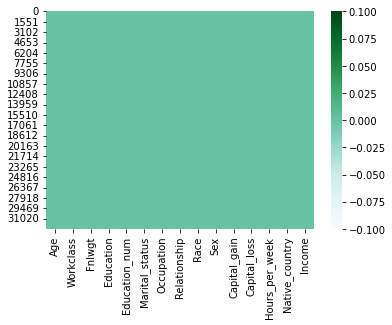

In [9]:
# Let's visualize the null values clearly
sns.heatmap(df.isnull(),cmap="BuGn")
plt.show()

In [10]:
# Checking the value counts of each columns
for i in df.columns:
        print(df[i].value_counts())
        print('****************************************')

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64
****************************************
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
****************************************
164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64
****************************************
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              4

In [11]:
# Dropping the columns having more number of 0's
df.drop("Capital_gain",axis=1,inplace=True)
df.drop("Capital_loss",axis=1,inplace=True)

# Filling ? values

In [12]:
df['Workclass'] = df.Workclass.str.replace('?', 'Private')
df['Occupation'] = df.Occupation.str.replace('?', 'Prof-specialty')
df['Native_country'] = df.Native_country.str.replace('?', 'United-States')

In [13]:
df["Workclass"].value_counts()

 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [14]:
df["Occupation"].value_counts()

 Prof-specialty       5983
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [15]:
df["Native_country"].value_counts()

 United-States                 29752
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

# Feature engineering

Most of the columns have unique type of classes, let's replace them with the new classes.

In [16]:
df.Workclass=df.Workclass.replace([' Local-gov',' State-gov',' Federal-gov'],' Govt-Sector')
df.Workclass=df.Workclass.replace([' Private',' Self-emp-not-inc',' Self-emp-inc'],' Pvt-sector')
df.Workclass=df.Workclass.replace([' Without-pay',' Never-worked'],'Not-working')

In [17]:
df["Workclass"].value_counts()

 Pvt-sector     28189
 Govt-Sector     4350
Not-working        21
Name: Workclass, dtype: int64

In [18]:
df["Education"]=df["Education"].replace([' Preschool',' 1st-4th',' 5th-6th',' 7th-8th',' 9th',' 10th',' 11th',' 12th'],'School')
df["Education"]=df["Education"].replace([' HS-grad',' Prof-school'],' High-School')
df["Education"]=df["Education"].replace([' Some-college',' Assoc-voc',' Assoc-acdm'],' Secondary-School')
df["Education"]=df["Education"].replace([' Bachelors',],' Under_Graduation')
df["Education"]=df["Education"].replace([' Masters'],'Post_Graduation')
df["Education"]=df["Education"].replace([' Doctorate'],' PhD')

In [19]:
df["Education"].value_counts()

 High-School         11077
 Secondary-School     9740
 Under_Graduation     5354
School                4253
Post_Graduation       1723
 PhD                   413
Name: Education, dtype: int64

In [20]:
df["Marital_status"]=df["Marital_status"].replace([' Married-civ-spouse',' Married-AF-spouse'],' Married')
df["Marital_status"]=df["Marital_status"].replace([' Never-married'],' Single')
df["Marital_status"]=df["Marital_status"].replace([' Divorced',' Widowed',' Separated',' Married-spouse-absent',],' Others')

In [21]:
df["Marital_status"].value_counts()

 Married    14999
 Single     10682
 Others      6879
Name: Marital_status, dtype: int64

In [22]:
# Let's check the dataframe 
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,Pvt-sector,83311,Under_Graduation,13,Married,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Pvt-sector,215646,High-School,9,Others,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Pvt-sector,234721,School,7,Married,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Pvt-sector,338409,Under_Graduation,13,Married,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Pvt-sector,284582,Post_Graduation,14,Married,Exec-managerial,Wife,White,Female,40,United-States,<=50K


In [23]:
# Checking the list of value counts in Income
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

In [24]:
# Checking wheather the dataset contains any space
df.loc[df['Income']==" "]

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income


# Description of Dataset

In [25]:
# Statistical summary of dataset
df.describe()

,Age,Fnlwgt,Education_num,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,40.437469
std,13.640642,1.055498e+05,2.572709,12.347618
min,17.000000,1.228500e+04,1.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99.000000


In [26]:
# checking for categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


In [27]:
# Now checking for numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['Age', 'Fnlwgt', 'Education_num', 'Hours_per_week']


# Data Visualization

# Univariate Analysis

# Plotting categorical columns

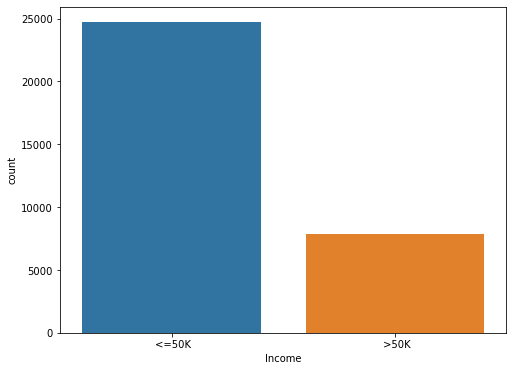

In [28]:
#Visualize the whether the income is above 50K or not
plt.figure(figsize=(8,6))
sns.countplot(df["Income"])
plt.show()

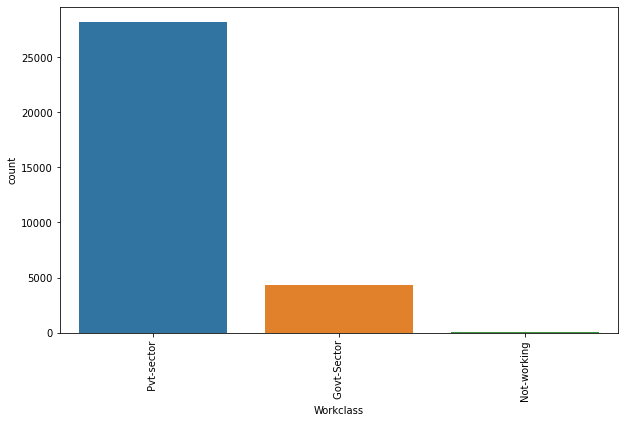

In [29]:
#Visualize the count of workclass of the people
plt.figure(figsize=(10,6))
sns.countplot(df["Workclass"])
plt.xticks(rotation=90)
plt.show()

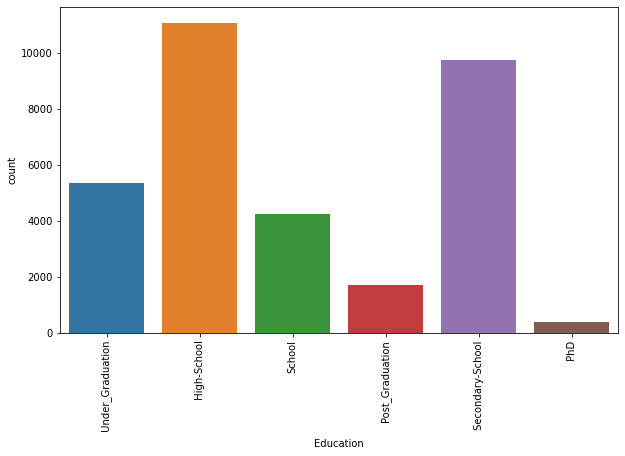

In [30]:
#Visualize the count Education of the people
plt.figure(figsize=(10,6))
sns.countplot(df["Education"])
plt.xticks(rotation=90)
plt.show()

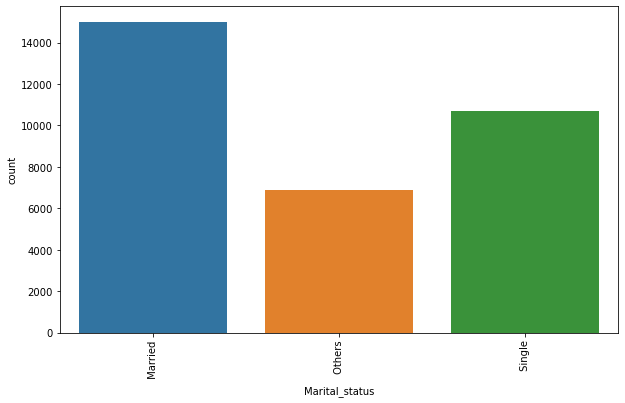

In [31]:
# Visualize the marital status of the people
plt.figure(figsize=(10,6))
sns.countplot(df["Marital_status"])
plt.xticks(rotation=90)
plt.show()

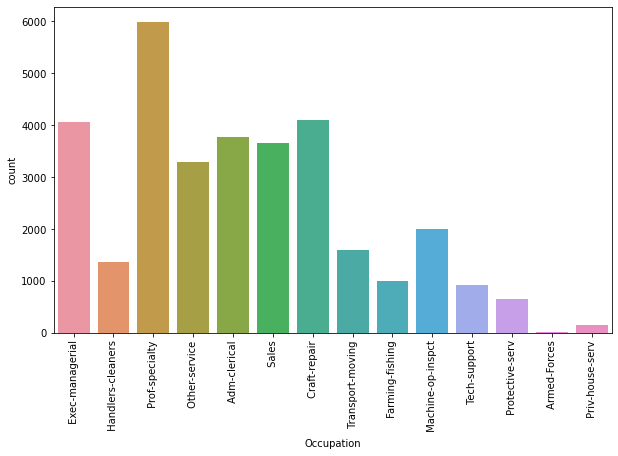

In [32]:
# Visualize the count of Occupation of the people
plt.figure(figsize=(10,6))
sns.countplot(df["Occupation"])
plt.xticks(rotation=90)
plt.show()

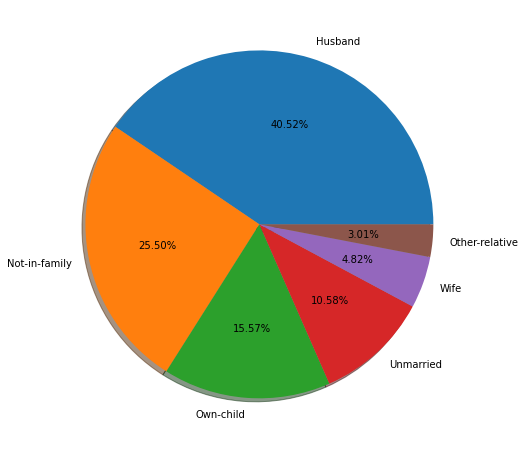

In [33]:
# Visualize the count of Relationship of the people
labels='Husband','Not-in-family','Own-child', 'Unmarried','Wife','Other-relative'
fig, ax = plt.subplots(figsize=(10,8))
ax.pie(df['Relationship'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

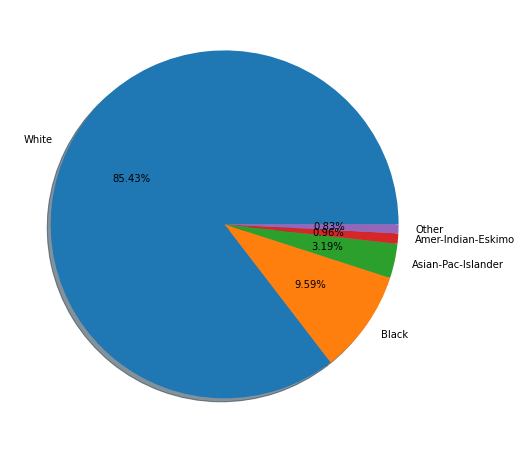

In [34]:
# Visualize the count of Race of the people

labels='White','Black','Asian-Pac-Islander', 'Amer-Indian-Eskimo','Other'
fig, ax = plt.subplots(figsize=(10,8))
ax.pie(df['Race'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

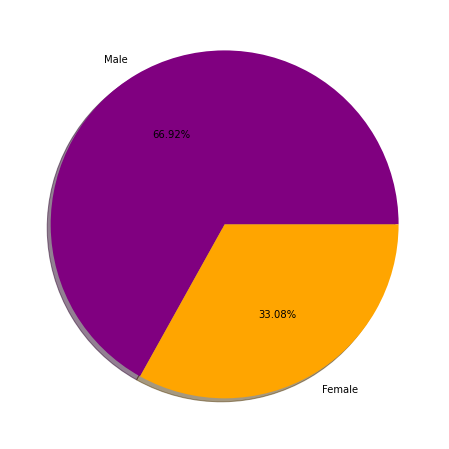

In [35]:
# Visualize the count of Sex group of the people
labels='Male','Female'
fig, ax = plt.subplots(figsize=(10,8))
colors = ["purple","orange"]
ax.pie(df['Sex'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True,colors=colors)
plt.show()

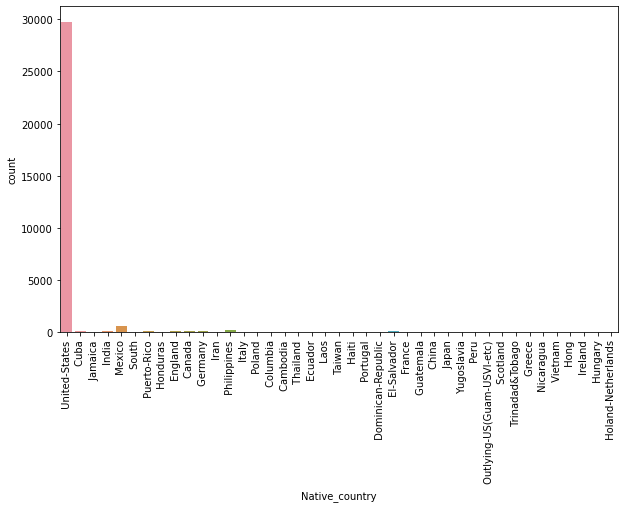

In [36]:
# Visualizing the Native country of the people
plt.figure(figsize=(10,6))
sns.countplot(df["Native_country"])
plt.xticks(rotation=90)
plt.show()

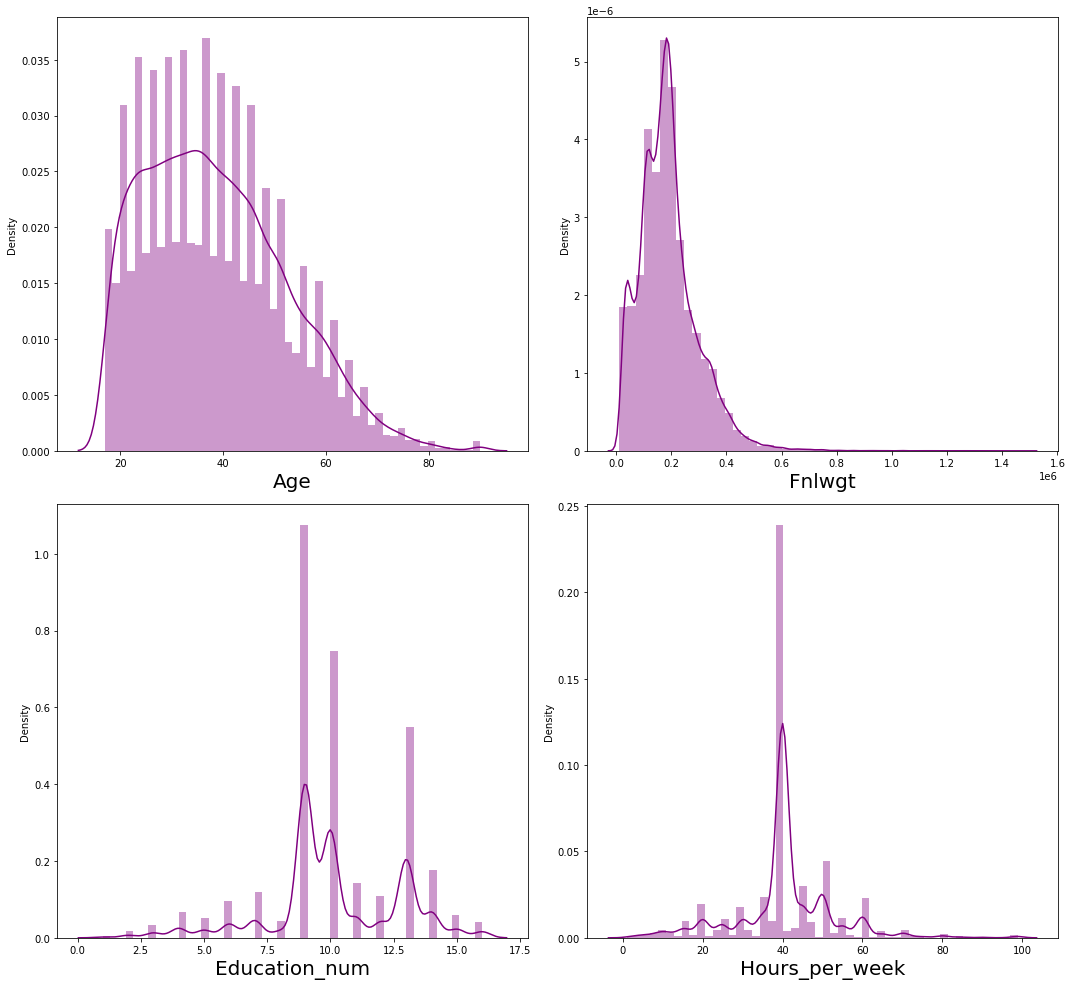

In [37]:
#Distribution of skewness
# Checking how the data has been distriubted in each column

plt.figure(figsize=(15,20),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=6:
        ax=plt.subplot(3,2,plotnumber)
        sns.distplot(df[column],color="purple")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

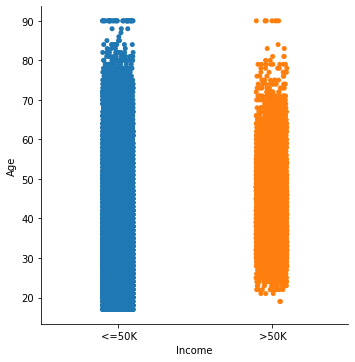

In [38]:
#Bivariate Analysis
# Visualizing the age of the people who have the income more
sns.catplot(df['Income'],df['Age'], data=df,kind="strip",size=5);
plt.title('Comparision between Income and Age')
plt.show()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

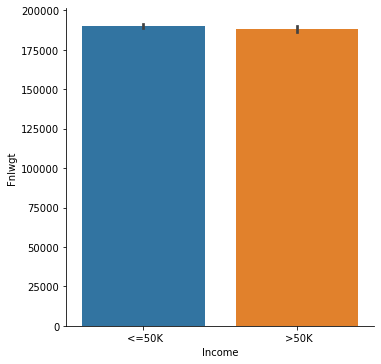

In [40]:
# Visualizing the Final weight with income
sns.catplot(df['Income'],df['Fnlwgt'], data=df,kind='bar');
plt.title('Comparision between Income and Final weight')
plt.show()

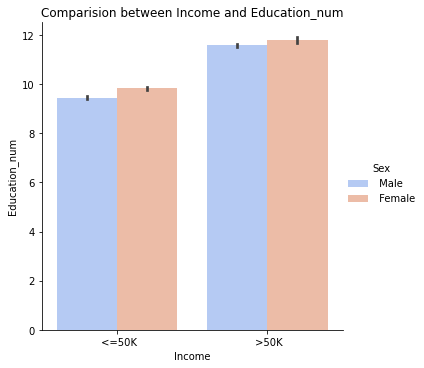

In [45]:
# Visualizing the number of education with income
sns.catplot(x='Income',y='Education_num', data=df,kind='bar',hue="Sex",palette="coolwarm")
plt.title('Comparision between Income and Education_num')
plt.show()

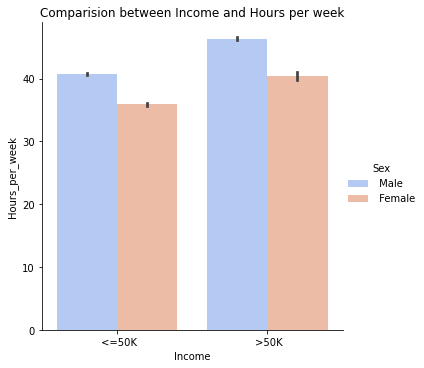

In [41]:
# Visualizing the number of Hours per week with income
sns.catplot(x='Income',y='Hours_per_week', data=df,kind='bar',hue="Sex",palette="coolwarm");
plt.title('Comparision between Income and Hours per week')
plt.show()

<Figure size 720x432 with 0 Axes>

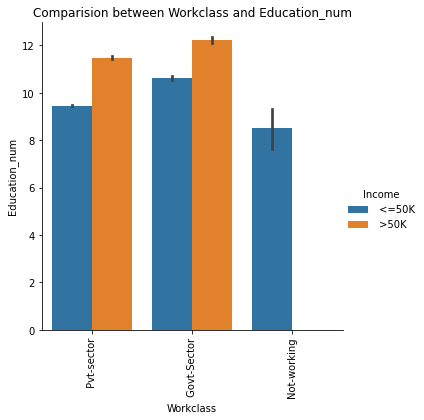

In [42]:
# Visualizing how the income changes with work class of the people
plt.figure(figsize=(10,6))
sns.catplot(x='Workclass',y='Education_num', data=df,kind='bar',hue="Income");
plt.title('Comparision between Workclass and Education_num')
plt.xticks(rotation=90)
plt.show()

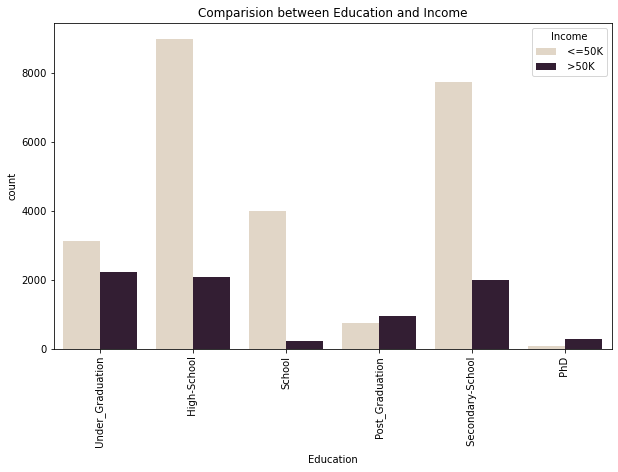

In [43]:
# Visualizing the relation between Education and Income of the people
plt.figure(figsize=(10,6))
sns.countplot(df["Education"],hue=df["Income"],palette="ch:.25" )
plt.title("Comparision between Education and Income")
plt.xticks(rotation=90)
plt.show()

<Figure size 720x432 with 0 Axes>

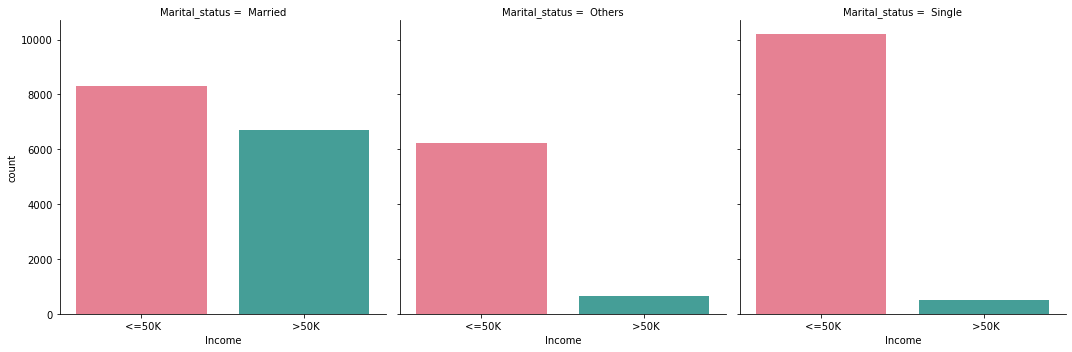

In [44]:
# Visualizing the relation between Marital status and Income of the people
plt.figure(figsize=(10,6))
sns.catplot(x='Income',col='Marital_status',data=df,kind='count',palette="husl")
plt.show()

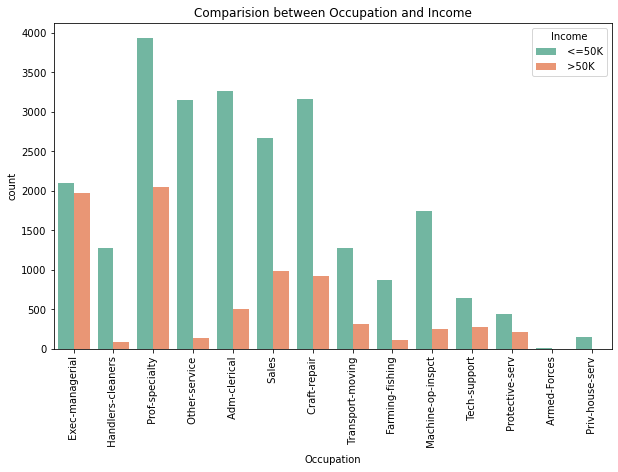

In [46]:
# Visualizing the relation between Occupation and Income of the people
plt.figure(figsize=(10,6))
sns.countplot(df["Occupation"],hue=df["Income"],palette="Set2" )
plt.title("Comparision between Occupation and Income")
plt.xticks(rotation=90)
plt.show()

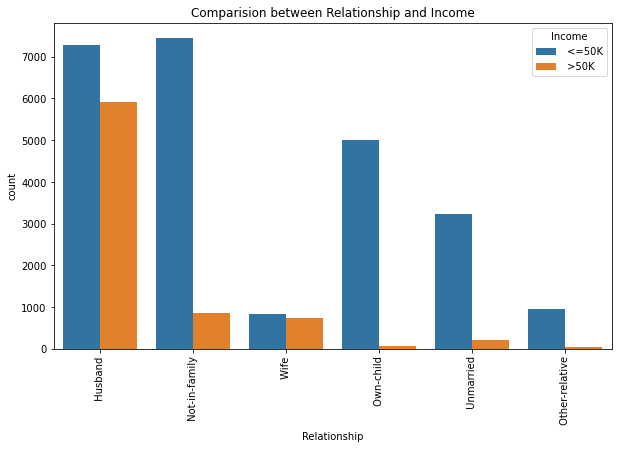

In [47]:
# Visualizing the relation between Relationship and Income of the people
plt.figure(figsize=(10,6))
sns.countplot(df["Relationship"],hue=df["Income"] )
plt.title("Comparision between Relationship and Income")
plt.xticks(rotation=90)
plt.show()

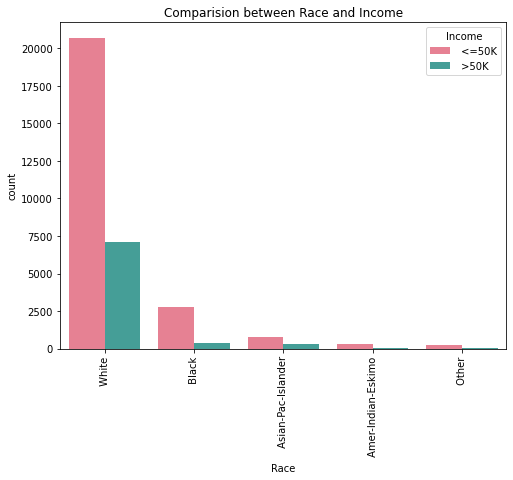

In [48]:
# Visualizing the relation between Race and Income of the people
plt.figure(figsize=(8,6))
sns.countplot(df['Race'],hue=df['Income'],data=df,palette="husl")
plt.title("Comparision between Race and Income")
plt.xticks(rotation=90)
plt.show()

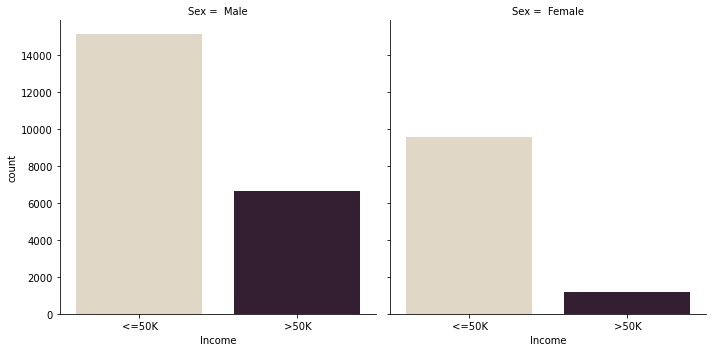

In [49]:
# Visualizing the relation between Income and Sex groups of the people
sns.catplot(x='Income',col='Sex',data=df,kind='count',palette="ch:.28")
plt.show()

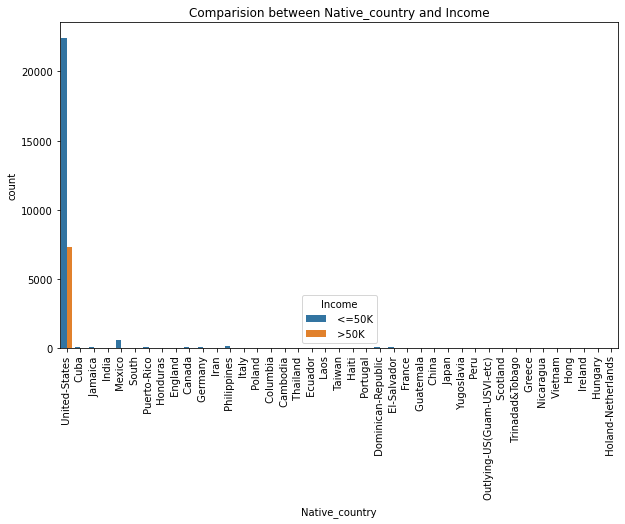

In [50]:
# Visualizing the relation between Native country and Income of the people
plt.figure(figsize=(10,6))
sns.countplot(df["Native_country"],hue=df["Income"] )
plt.title("Comparision between Native_country and Income")
plt.xticks(rotation=90)
plt.show()

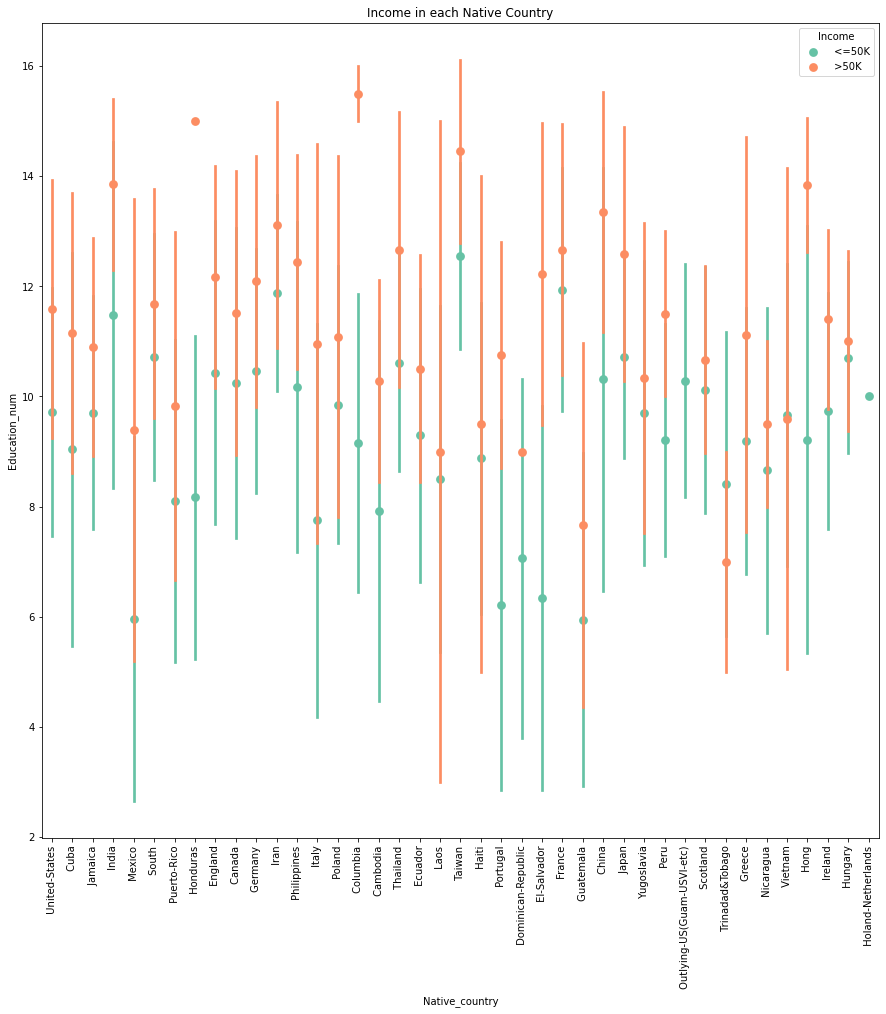

In [51]:
# Visualizing how the income changes for Native country of the people
plt.figure(figsize=(15,15))
plt.title("Income in each Native Country")
sns.pointplot(x='Native_country',y='Education_num',data=df, hue='Income',join=False,palette="Set2",ci="sd")
plt.xticks(rotation=90)
plt.show()

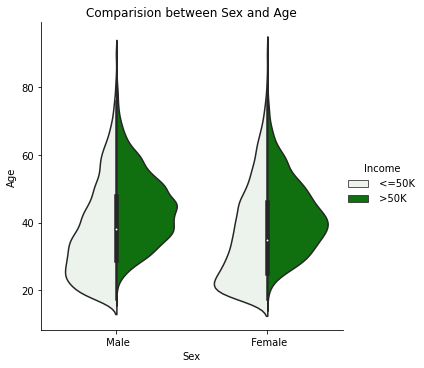

In [52]:
# Visualizing the relationship between Sex and Age of the people
sns.catplot(x="Sex", y="Age", kind="violin",color="g", data=df,hue="Income",split=True)
plt.title("Comparision between Sex and Age")
plt.show()

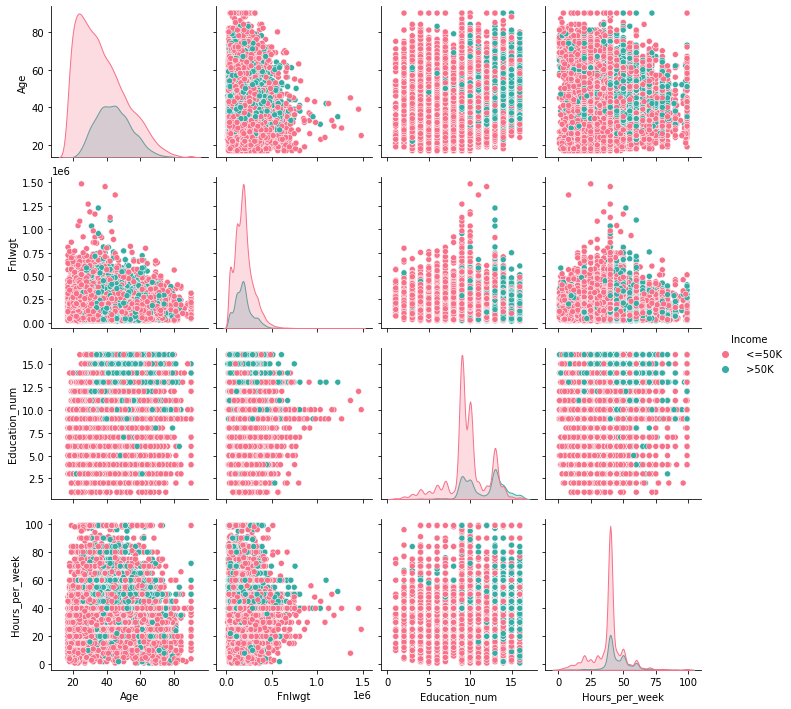

In [53]:
# Checking the pairwise relation in the dataset.
sns.pairplot(df,hue="Income",palette="husl")

# Identifying the outliers

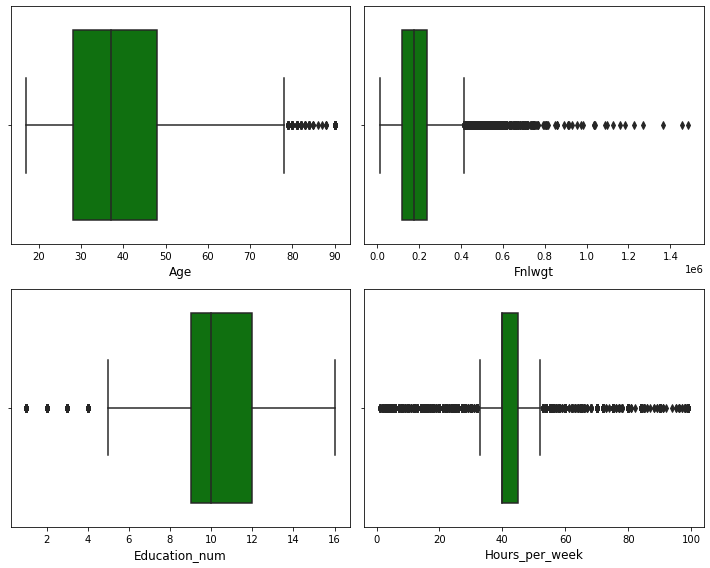

In [54]:
# Identifying the outliers using boxplot

plt.figure(figsize=(10,8),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(df[column],color="g")
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()

# Removing outliers

1.Zscore method

In [55]:
# Features containing outliers
features = df[["Age","Fnlwgt","Education_num","Hours_per_week"]]

# Using zscore to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(features))

z

,Age,Fnlwgt,Education_num,Hours_per_week
0,0.837097,1.008742,1.134779,2.222120
1,0.042640,0.245046,0.420027,0.035430
2,1.057031,0.425770,1.197429,0.035430
3,0.775755,1.408146,1.134779,0.035430
4,0.115952,0.898170,1.523480,0.035430
...,...,...,...,...
32555,0.849066,0.639710,0.746077,0.197407
32556,0.103982,0.335466,0.420027,0.035430
32557,1.423589,0.358811,0.420027,0.035430
32558,1.215624,0.110927,0.420027,1.655200


In [56]:
# Creating new dataframe
new_df = df[(z<3).all(axis=1)] 
new_df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,Pvt-sector,83311,Under_Graduation,13,Married,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Pvt-sector,215646,High-School,9,Others,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Pvt-sector,234721,School,7,Married,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Pvt-sector,338409,Under_Graduation,13,Married,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Pvt-sector,284582,Post_Graduation,14,Married,Exec-managerial,Wife,White,Female,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Pvt-sector,257302,Secondary-School,12,Married,Tech-support,Wife,White,Female,38,United-States,<=50K
32556,40,Pvt-sector,154374,High-School,9,Married,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32557,58,Pvt-sector,151910,High-School,9,Others,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
32558,22,Pvt-sector,201490,High-School,9,Single,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


In [57]:
# Shape of original dataset
df.shape

(32560, 13)

In [58]:
# Shape of new dataframe
new_df.shape

(31461, 13)

In [59]:
# Checking the the data loss
data_loss = (32560-31461)/36560*100
data_loss

3.0060175054704596

2. IQR (Inter Quantile Range) method

In [60]:
# 1st quantile
Q1=features.quantile(0.25)

# 3rd quantile
Q3=features.quantile(0.75)

# IQR
IQR=Q3 - Q1

df1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

df1.shape

(21950, 13)

In [61]:
# Checking the the data loss
data_loss = (32560-21950)/36560*100
data_loss

29.02078774617068

In [62]:
# Checking the skewness
new_df.skew()

Age               0.472279
Fnlwgt            0.634828
Education_num    -0.159752
Hours_per_week   -0.341724
dtype: float64

In [63]:
# Checking the skewness
new_df.skew()

Age               0.472279
Fnlwgt            0.634828
Education_num    -0.159752
Hours_per_week   -0.341724
dtype: float64

In [64]:
# Removing skewness using cube root method
new_df["Fnlwgt"] = np.cbrt(df["Fnlwgt"])

In [65]:
new_df.skew()

Age               0.472279
Fnlwgt           -0.376609
Education_num    -0.159752
Hours_per_week   -0.341724
dtype: float64

<AxesSubplot:xlabel='Fnlwgt', ylabel='Density'>

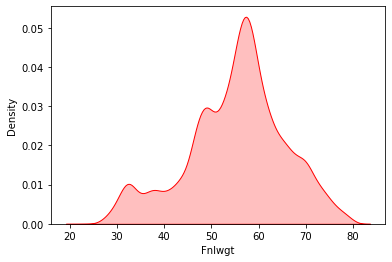

In [67]:
# After removing let's check how the data has been distributed in each column.
sns.distplot(new_df["Fnlwgt"],color="red",kde_kws={"shade": True},hist=False)

# Encoding the categorical columns using Label Encoding

In [69]:
categorical_col = ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']

from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
new_df[categorical_col]= new_df[categorical_col].apply(LE.fit_transform)

In [70]:
new_df[categorical_col]

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
0,1,3,0,3,0,4,1,38,0
1,1,0,1,5,1,4,1,38,0
2,1,5,0,5,0,2,1,38,0
3,1,3,0,9,5,2,0,4,0
4,1,4,0,3,5,4,0,38,0
...,...,...,...,...,...,...,...,...,...
32555,1,2,0,12,5,4,0,38,0
32556,1,0,0,6,0,4,1,38,1
32557,1,0,1,0,4,4,0,38,0
32558,1,0,2,0,3,4,1,38,0


# Correlation between the target variable and independent variables using HEAT map

In [71]:
# Checking the correlation between features and the target
cor = new_df.corr()
cor

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
Age,1.000000,-0.083618,-0.062328,-0.009682,0.053361,-0.476050,-0.001321,-0.268028,0.030679,0.091664,0.097510,-0.001039,0.248351
Workclass,-0.083618,1.000000,0.021707,-0.035701,-0.161488,0.034265,0.005610,0.001008,0.051670,0.036158,-0.006349,-0.031665,-0.062963
Fnlwgt,-0.062328,0.021707,1.000000,0.007806,-0.031874,0.030462,0.001524,0.009060,-0.006959,0.023307,-0.015820,-0.061390,-0.002780
Education,-0.009682,-0.035701,0.007806,1.000000,-0.052888,0.037934,0.068764,0.001954,-0.005373,0.001626,-0.053121,-0.073192,0.034278
Education_num,0.053361,-0.161488,-0.031874,-0.052888,1.000000,-0.071406,0.073927,-0.102497,0.030849,0.016662,0.160483,0.054510,0.337595
Marital_status,-0.476050,0.034265,0.030462,0.037934,-0.071406,1.000000,0.001052,0.451130,-0.081701,-0.336209,-0.241789,0.009096,-0.425904
Occupation,-0.001321,0.005610,0.001524,0.068764,0.073927,0.001052,1.000000,-0.037549,-0.004094,0.047864,-0.019943,-0.003666,0.034612
Relationship,-0.268028,0.001008,0.009060,0.001954,-0.102497,0.451130,-0.037549,1.000000,-0.115216,-0.582940,-0.263412,-0.010871,-0.251506
Race,0.030679,0.051670,-0.006959,-0.005373,0.030849,-0.081701,-0.004094,-0.115216,1.000000,0.088642,0.045331,0.122051,0.072451
Sex,0.091664,0.036158,0.023307,0.001626,0.016662,-0.336209,0.047864,-0.582940,0.088642,1.000000,0.239039,0.002060,0.216665


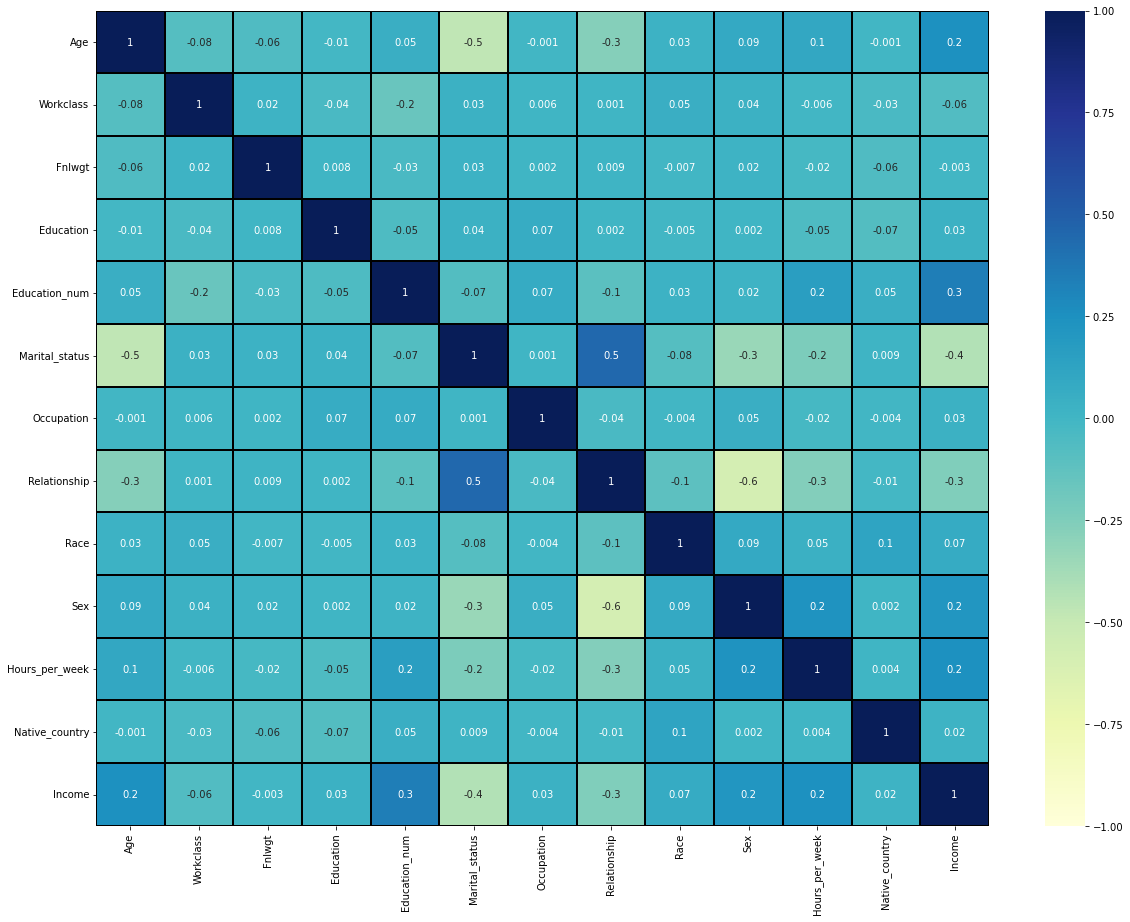

In [72]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(20,15))
sns.heatmap(new_df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="YlGnBu")
plt.yticks(rotation=0);

In [73]:
cor['Income'].sort_values(ascending=False)

Income            1.000000
Education_num     0.337595
Age               0.248351
Hours_per_week    0.242383
Sex               0.216665
Race              0.072451
Occupation        0.034612
Education         0.034278
Native_country    0.017698
Fnlwgt           -0.002780
Workclass        -0.062963
Relationship     -0.251506
Marital_status   -0.425904
Name: Income, dtype: float64

# Visualizing the correlation between label and features using bar plot

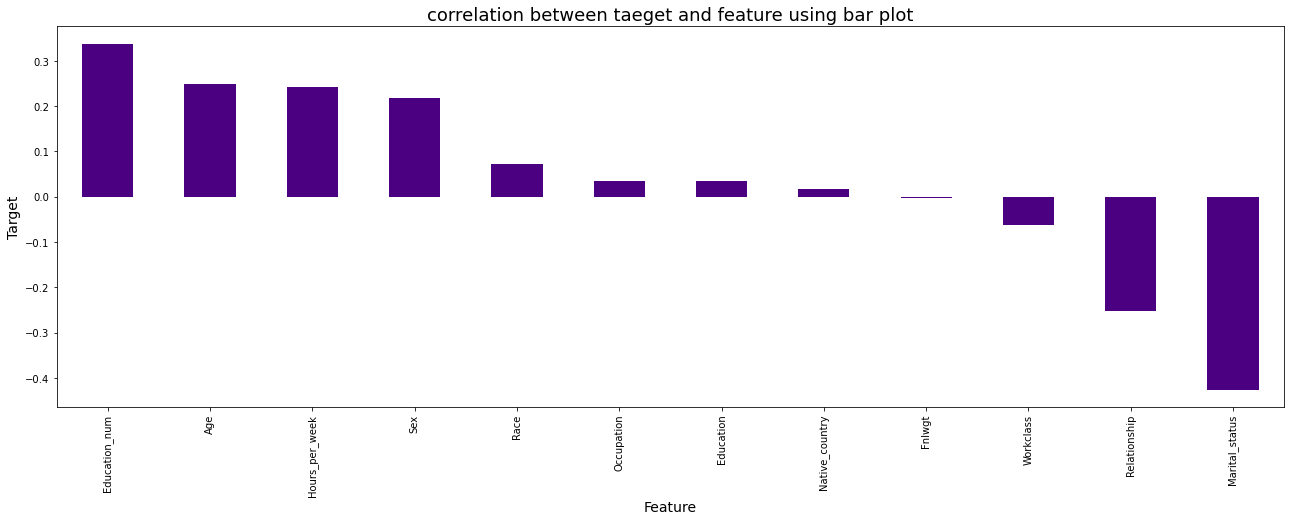

In [74]:
plt.figure(figsize=(22,7))
new_df.corr()['Income'].sort_values(ascending=False).drop(['Income']).plot(kind='bar',color='indigo')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('correlation between taeget and feature using bar plot',fontsize=18)
plt.show()

In [75]:
df.drop("Fnlwgt",axis=1,inplace=True)

In [76]:
#Separating the features and label variables into x and y
x = new_df.drop("Income", axis=1)
y = new_df["Income"]

In [77]:
# Dimension of x
x.shape

(31461, 12)

In [78]:
# Dimension of y
y.shape

(31461,)

# Feature Scaling using Standard Scalarization

In [79]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country
0,0.875057,0.392103,-1.102052,0.621080,1.154324,-0.990371,-0.784335,-0.903178,0.391304,0.706601,-2.424121,0.254062
1,-0.025350,0.392103,0.464976,-1.149684,-0.459657,0.147158,-0.282327,-0.281938,0.391304,0.706601,-0.008364,0.254062
2,1.100158,0.392103,0.630260,1.801589,-1.266647,-0.990371,-0.282327,-0.903178,-1.969806,0.706601,-0.008364,0.254062
3,-0.775689,0.392103,1.399791,0.621080,1.154324,-0.990371,0.721690,2.203019,-1.969806,-1.415226,-0.008364,-5.457546
4,-0.100384,0.392103,1.023711,1.211335,1.557819,-0.990371,-0.784335,2.203019,0.391304,-1.415226,-0.008364,0.254062
...,...,...,...,...,...,...,...,...,...,...,...,...
31456,-0.850723,0.392103,0.814728,0.030825,0.750829,-0.990371,1.474703,2.203019,0.391304,-1.415226,-0.187309,0.254062
31457,0.124718,0.392103,-0.143169,-1.149684,-0.459657,-0.990371,-0.031323,-0.903178,0.391304,0.706601,-0.008364,0.254062
31458,1.475327,0.392103,-0.170768,-1.149684,-0.459657,0.147158,-1.537348,1.581780,0.391304,-1.415226,-0.008364,0.254062
31459,-1.225892,0.392103,0.335900,-1.149684,-0.459657,1.284688,-1.537348,0.960541,0.391304,0.706601,-1.797814,0.254062


In [80]:
y.value_counts()

0    23853
1     7608
Name: Income, dtype: int64

# Modeling Finding best random state

In [82]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_train, y_train)
    pred = DTC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.7812268248755164  on Random_state  88


In [83]:
#Creating train_test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [85]:
#Classification Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

In [86]:
# Checking Accuracy for Decision Tree Classifier
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)

#Prediction
predDTC = DTC.predict(x_test)

print(accuracy_score(y_test, predDTC))
print(confusion_matrix(y_test, predDTC))
print(classification_report(y_test,predDTC))

0.7810149380230956
[[6100 1081]
 [ 986 1272]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      7181
           1       0.54      0.56      0.55      2258

    accuracy                           0.78      9439
   macro avg       0.70      0.71      0.70      9439
weighted avg       0.78      0.78      0.78      9439



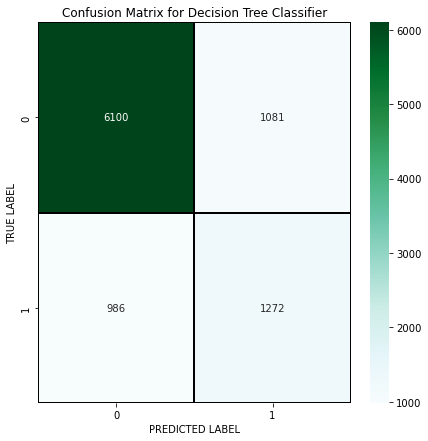

In [87]:
# Lets plot confusion matrix for DTC
cm = confusion_matrix(y_test,predDTC)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

In [88]:
# Checking accuracy for Random Forest Classifier
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)

# Prediction
predRFC = RFC.predict(x_test)

print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test,predRFC))

0.8277359889818837
[[6511  670]
 [ 956 1302]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      7181
           1       0.66      0.58      0.62      2258

    accuracy                           0.83      9439
   macro avg       0.77      0.74      0.75      9439
weighted avg       0.82      0.83      0.82      9439



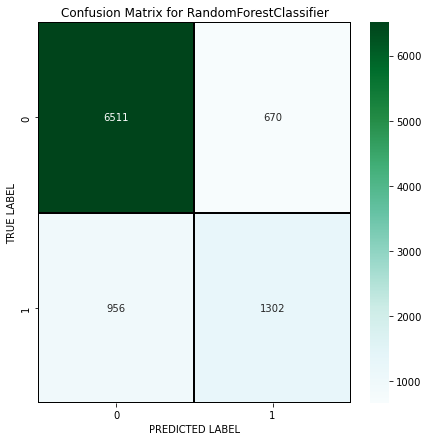

In [89]:
# Lets plot confusion matrix for RandomForestClassifier
cm = confusion_matrix(y_test,predRFC)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

In [90]:
# Checking accuracy for Logistic Regression Classifier
LR = LogisticRegression()
LR.fit(x_train,y_train)

# Prediction
predLR = LR.predict(x_test)

print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test,predLR))

0.8247695730479924
[[6625  556]
 [1098 1160]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      7181
           1       0.68      0.51      0.58      2258

    accuracy                           0.82      9439
   macro avg       0.77      0.72      0.74      9439
weighted avg       0.81      0.82      0.82      9439



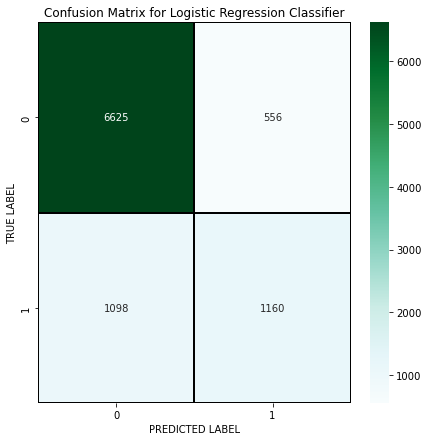

In [91]:
# Lets plot confusion matrix for Logistic Regression
cm = confusion_matrix(y_test,predLR)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression Classifier')
plt.show()

In [92]:
# Checking accuracy for KNeighbors Classifier
knn = KNN()
knn.fit(x_train,y_train)

# Prediction
predknn = knn.predict(x_test)

print(accuracy_score(y_test, predknn))
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test,predknn))

0.8133276830172688
[[6361  820]
 [ 942 1316]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      7181
           1       0.62      0.58      0.60      2258

    accuracy                           0.81      9439
   macro avg       0.74      0.73      0.74      9439
weighted avg       0.81      0.81      0.81      9439



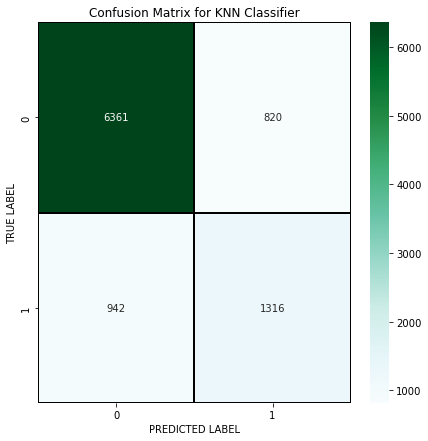

In [93]:
# Lets plot confusion matrix for KNN Classifier
cm = confusion_matrix(y_test,predknn)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for KNN Classifier')
plt.show()

In [94]:
# Checking accuracy for Gradient Boosting Classifier
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)

# Prediction
predGB = GB.predict(x_test)

print(accuracy_score(y_test, predGB))
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test,predGB))

0.8448988240279691
[[6649  532]
 [ 932 1326]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      7181
           1       0.71      0.59      0.64      2258

    accuracy                           0.84      9439
   macro avg       0.80      0.76      0.77      9439
weighted avg       0.84      0.84      0.84      9439



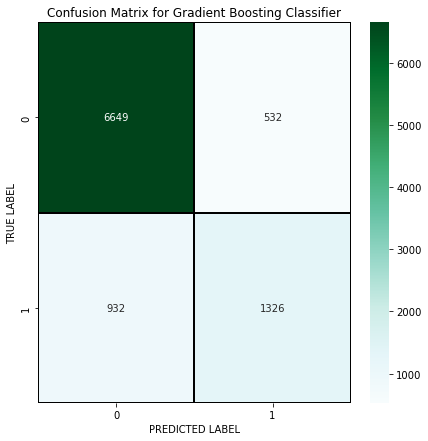

In [95]:
# Lets plot confusion matrix for Gradient Boosting Classifier
cm = confusion_matrix(y_test,predGB)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()

In [96]:
from sklearn.ensemble import ExtraTreesClassifier
XT=ExtraTreesClassifier()
XT.fit(x_train,y_train)

#Prediction
predXT=XT.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test, predXT))
print('Confusion Matrix:',confusion_matrix(y_test, predXT))
print(classification_report(y_test,predXT))

Accuracy Score: 0.8138574001483208
Confusion Matrix: [[6414  767]
 [ 990 1268]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      7181
           1       0.62      0.56      0.59      2258

    accuracy                           0.81      9439
   macro avg       0.74      0.73      0.74      9439
weighted avg       0.81      0.81      0.81      9439



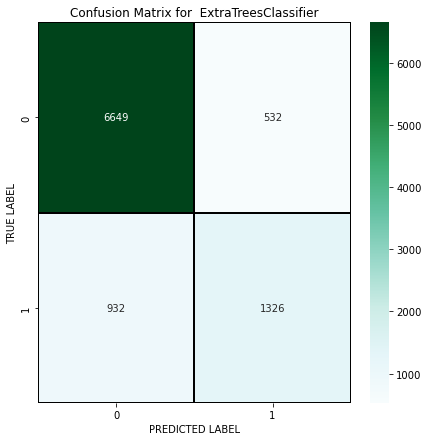

In [97]:
cm = confusion_matrix(y_test,predGB)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  ExtraTreesClassifier')
plt.show()

# Checking the Cross Validation Score

In [99]:
from sklearn.model_selection import cross_val_score

In [100]:
# cv score for Decision Tree Classifier
print(cross_val_score(DTC,x,y,cv=5).mean())

0.7745146803848392


In [102]:
# cv score for Random Forest Classifier
print(cross_val_score(RFC,x,y,cv=5).mean())

0.8240044110000626


In [103]:
# cv score for Logistic Regression Classifier
print(cross_val_score(LR,x,y,cv=5).mean())

0.8230192448869766


In [104]:
# cv score for KNN Classifier
print(cross_val_score(knn,x,y,cv=5).mean())

0.8104004348366771


In [105]:
# cv score for Gradient Boosting Classifier
print(cross_val_score(GB,x,y,cv=5).mean())

0.8392932580615865


In [106]:
# cv score for  ExtraTreesClassifier
print(cross_val_score(XT,x,y,cv=5).mean())

0.8139921257830045


# Hyper Parameter Tuning

In [107]:
from sklearn.model_selection import GridSearchCV

In [108]:
# Decision Tree Classifier

parameters = {'criterion':["gini","entropy"],
              'max_features':['auto','sqrt', 'log2'],
              'max_depth':[10,20,30,40,50],
              'splitter':['best','random']}

In [109]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameters,cv=5)

In [110]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30, 40, 50],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [111]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'log2',
 'splitter': 'best'}

In [112]:
census = DecisionTreeClassifier(criterion='entropy', max_depth=20, max_features='sqrt',splitter='best')
census.fit(x_train, y_train)
pred = census.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

79.36222057421337


# Plotting ROC and compare AUC for all the models used

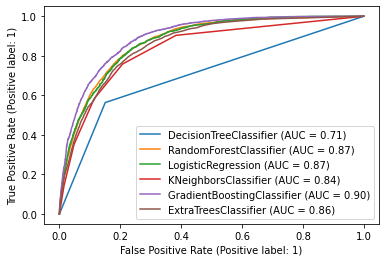

In [114]:
# Plotting for all the models used here
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve 


disp = plot_roc_curve(DTC,x_test,y_test)
plot_roc_curve(RFC, x_test, y_test, ax=disp.ax_)     # ax_=Axes with confusion matrix
plot_roc_curve(LR, x_test, y_test, ax=disp.ax_)
plot_roc_curve(knn, x_test, y_test, ax=disp.ax_)
plot_roc_curve(GB, x_test, y_test, ax=disp.ax_)
plot_roc_curve(XT, x_test, y_test, ax=disp.ax_)

# Plotting ROC and Compare AUC for the best model

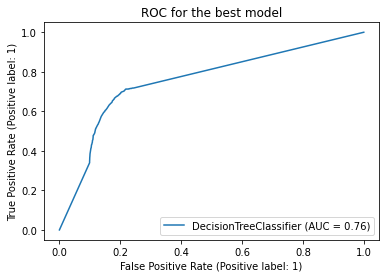

In [115]:
# Let's check the Auc for the best model after hyper parameter tuning
plot_roc_curve(census, x_test, y_test)
plt.title("ROC for the best model")
plt.show()

In [116]:
# Saving the model using .pkl
import joblib
joblib.dump(census,"Census Income Prediction.pkl")

['Census Income Prediction.pkl']

In [117]:
# Let's load the saved model and get the prediction

# Loading the saved model
model=joblib.load("Census Income Prediction.pkl")

#Prediction
prediction = model.predict(x_test)
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [118]:
pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"]).T

,Predicted,Original
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1
...,...,...
9434,0,0
9435,0,0
9436,0,0
9437,0,0
